# Long-Run Growth

## Overview

In this lecture we use Python, [pandas](https://python-programming.quantecon.org/pandas.html), and [Matplotlib](https://python-programming.quantecon.org/matplotlib.html) to download, organize, and visualize historical data on economic growth.

In addition to learning how to deploy these tools more generally, we’ll use them to describe facts about economic growth experiences across many countries over several centuries.

Such “growth facts” are interesting for a variety of reasons.

Explaining growth facts is a principal purpose of both “development economics” and “economic history”.

And growth facts are important inputs into historians’ studies of geopolitical forces and dynamics.

Thus, Adam Tooze’s account of the geopolitical precedents and antecedents of World War I begins by describing how the Gross Domestic Products (GDP) of European Great Powers had evolved during the 70 years preceding 1914 (see chapter 1 of [[Tooze, 2014](https://intro.quantecon.org/zreferences.html#id16)]).

Using the very same data that Tooze used to construct his figure (with a slightly longer timeline), here is our version of his chapter 1 figure.

![https://intro.quantecon.org/_static/lecture_specific/long_run_growth/tooze_ch1_graph.png](https://intro.quantecon.org/_static/lecture_specific/long_run_growth/tooze_ch1_graph.png)

  
(This is just a copy of our figure Fig. 2.6.  We describe how we constructed it later in this lecture.)

Chapter 1  of [[Tooze, 2014](https://intro.quantecon.org/zreferences.html#id16)] used his graph to show how US GDP started the 19th century way behind the GDP of the British Empire.

By the end of the nineteenth century, US GDP had caught up with GDP of the British Empire, and how during the first half of the 20th century,
US GDP surpassed that of the British Empire.

For Adam Tooze, that fact was a key geopolitical underpinning for the “American century”.

Looking at this  graph and how it set the geopolitical stage for “the American (20th) century” naturally
tempts one to want a counterpart to his graph for 2014 or later.

(An impatient reader seeking a hint at the answer  might now want to jump ahead and look at figure Fig. 2.7.)

As we’ll see, reasoning by analogy, this graph perhaps set the stage for an “XXX (21st) century”, where you are free to fill in your guess for country XXX.

As we gather data to construct those two graphs, we’ll also study growth experiences for a number of countries for time horizons extending as far back as possible.

These graphs will portray how the “Industrial Revolution” began in Britain in the late 18th century, then migrated to one country after another.

In a nutshell, this lecture records growth trajectories of various countries over long time periods.

While some countries have experienced long-term rapid growth across that has lasted a hundred years, others have not.

Since populations differ across countries and vary within a country over time, it will
be interesting to describe both total GDP and GDP per capita as it evolves within a country.

First let’s import the packages needed to explore what the data says about long-run growth

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple

## Setting up

A project initiated by [Angus Maddison](https://en.wikipedia.org/wiki/Angus_Maddison) has collected many historical time series related to economic growth,
some dating back to the first century.

The data can be downloaded from the [Maddison Historical Statistics](https://www.rug.nl/ggdc/historicaldevelopment/maddison/) by clicking on the “Latest Maddison Project Release”.

We are going to read the data from a QuantEcon GitHub repository.

Our objective in this section is to produce a convenient `DataFrame` instance that contains per capita GDP for different countries.

Here we read the Maddison data into a pandas `DataFrame`:

In [2]:
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/mpd2020.xlsx"
data = pd.read_excel(data_url, 
                     sheet_name='Full data')
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


We can see that this dataset contains GDP per capita (`gdppc`) and population (pop) for many countries and years.

Let’s look at how many and which countries are available in this dataset

In [3]:
countries = data.country.unique()
len(countries)

169

We can now explore some of the 169 countries that are available.

Let’s loop over each country to understand which years are available for each country

In [4]:
country_years = []
for country in countries:
    cy_data = data[data.country == country]['year']
    ymin, ymax = cy_data.min(), cy_data.max()
    country_years.append((country, ymin, ymax))
country_years = pd.DataFrame(country_years,
                    columns=['country', 'min_year', 'max_year']).set_index('country')
country_years.head()

,min_year,max_year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018


Let’s now reshape the original data into some convenient variables to enable quicker access to countries’ time series data.

We can build a useful mapping between country codes and country names in this dataset

In [5]:
code_to_name = data[
    ['countrycode', 'country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])

Now we can focus on GDP per capita (`gdppc`) and generate a wide data format

In [6]:
gdp_pc = data.set_index(['countrycode', 'year'])['gdppc']
gdp_pc = gdp_pc.unstack('countrycode')

In [7]:
gdp_pc.tail()

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000
2017,2014.7453,8146.4354,10702.1201,76643.4984,19200.9061,10859.3783,49265.6135,42177.3706,16522.3072,671.3169,...,19918.1361,54007.7698,10743.8666,12879.1350,6422.0865,2321.9239,15960.8432,12189.3579,3497.5818,1582.3662
2018,1934.5550,7771.4418,11104.1665,76397.8181,18556.3831,11454.4251,49830.7993,42988.0709,16628.0553,651.3589,...,20185.8360,55334.7394,11220.3702,10709.9506,6814.1423,2284.8899,16558.3123,12165.7948,3534.0337,1611.4052


We create a variable `color_mapping` to store a map between country codes and colors for consistency

In [8]:
country_names = data['countrycode']

# Generate a colormap with the number of colors matching the number of countries
colors = cm.tab20(np.linspace(0, 0.95, len(country_names)))

# Create a dictionary to map each country to its corresponding color
color_mapping = {country: color for 
                 country, color in zip(country_names, colors)}

## GDP per capita

In this section we examine GDP per capita over the long run for several different countries.

### United Kingdom

First we examine UK GDP growth

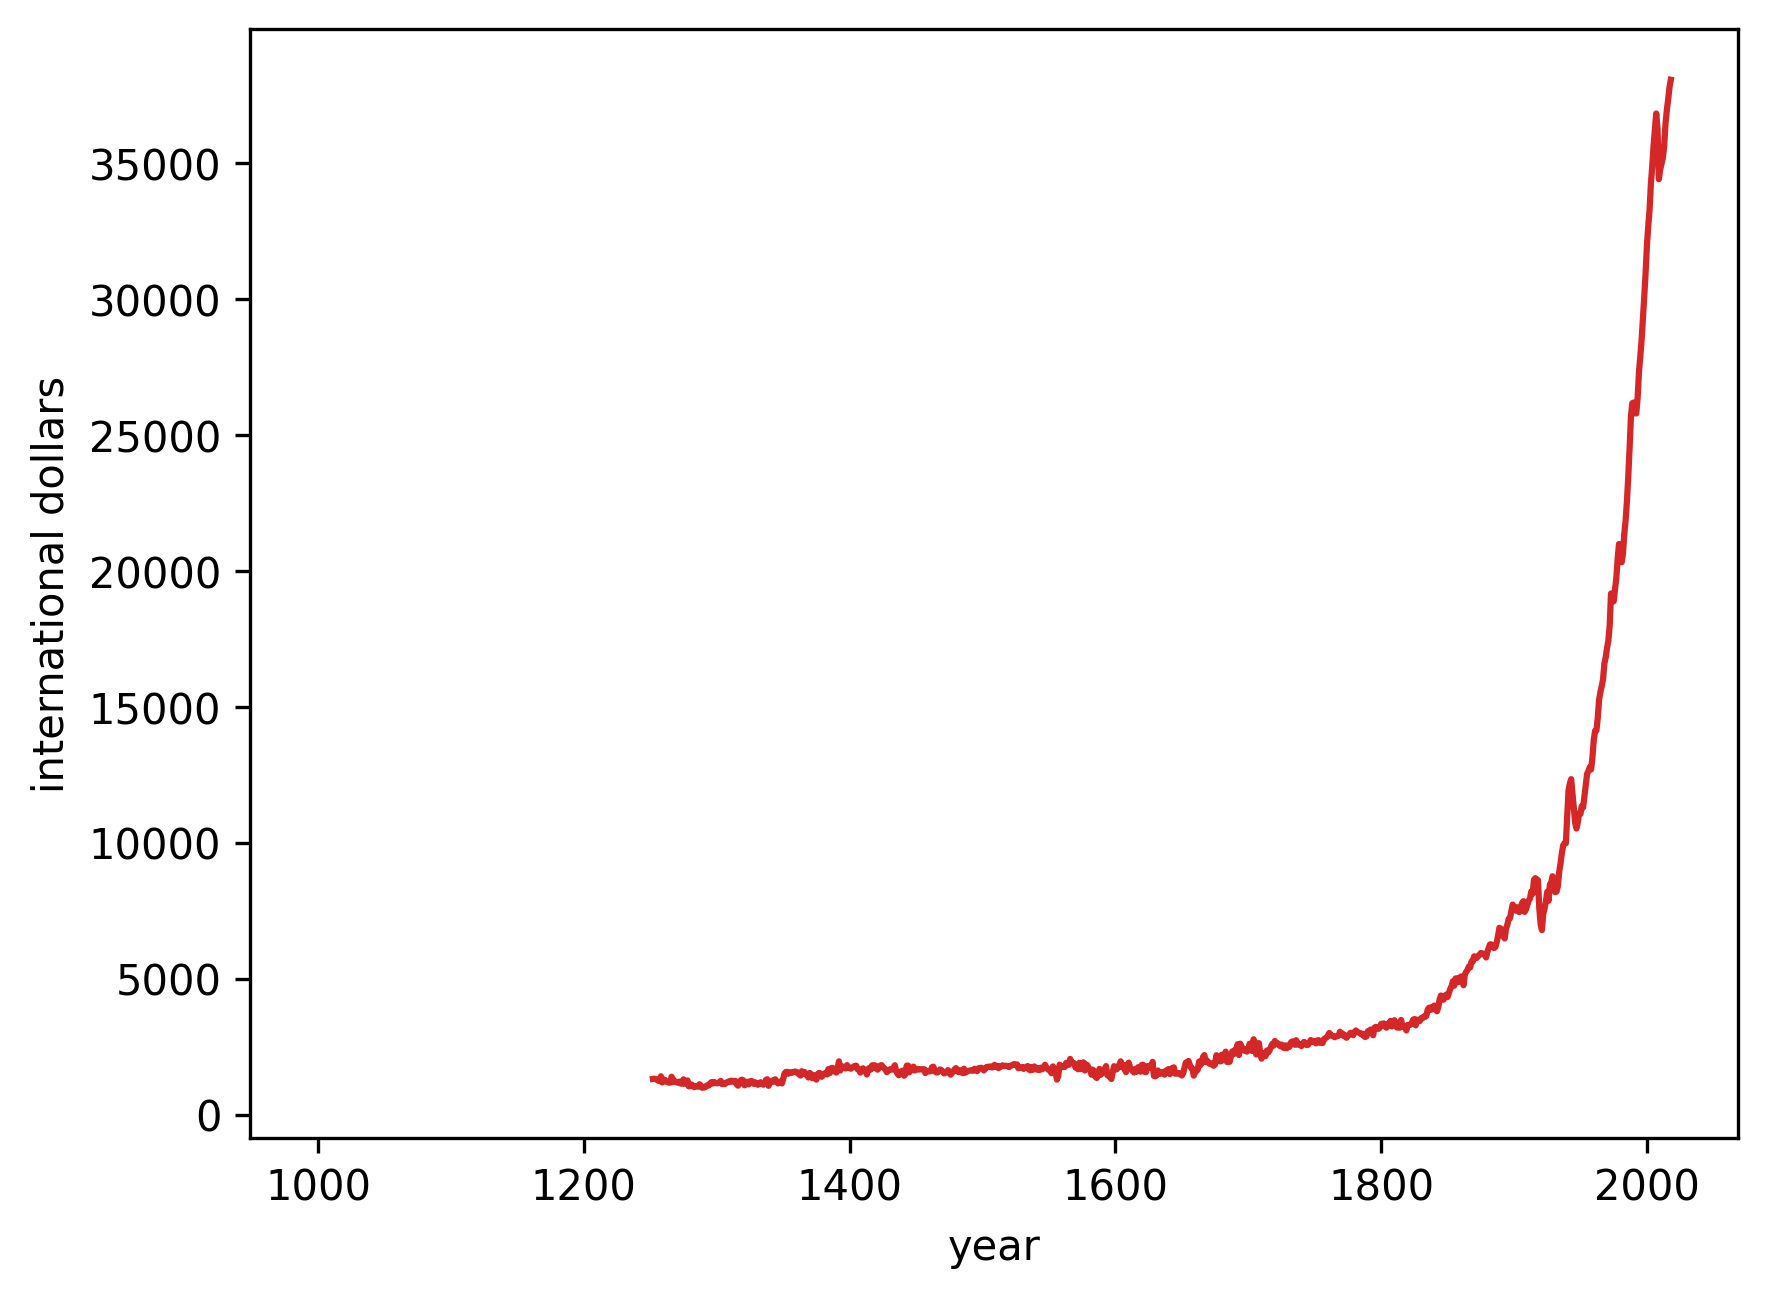

In [9]:
fig, ax = plt.subplots(dpi=300)
country = 'GBR'
gdp_pc[country].plot(
        ax=ax,
        ylabel='international dollars',
        xlabel='year',
        color=color_mapping[country]
    );

>**Note**
>
>[International dollars](https://en.wikipedia.org/wiki/international_dollar) are a hypothetical unit of currency that has the same purchasing power parity that the U.S. Dollar has in the United States at a given point in time. They are also known as Geary–Khamis dollars (GK Dollars).

We can see that the data is non-continuous for longer periods in the early 250 years of this millennium, so we could choose to interpolate to get a continuous line plot.

Here we use dashed lines to indicate interpolated trends

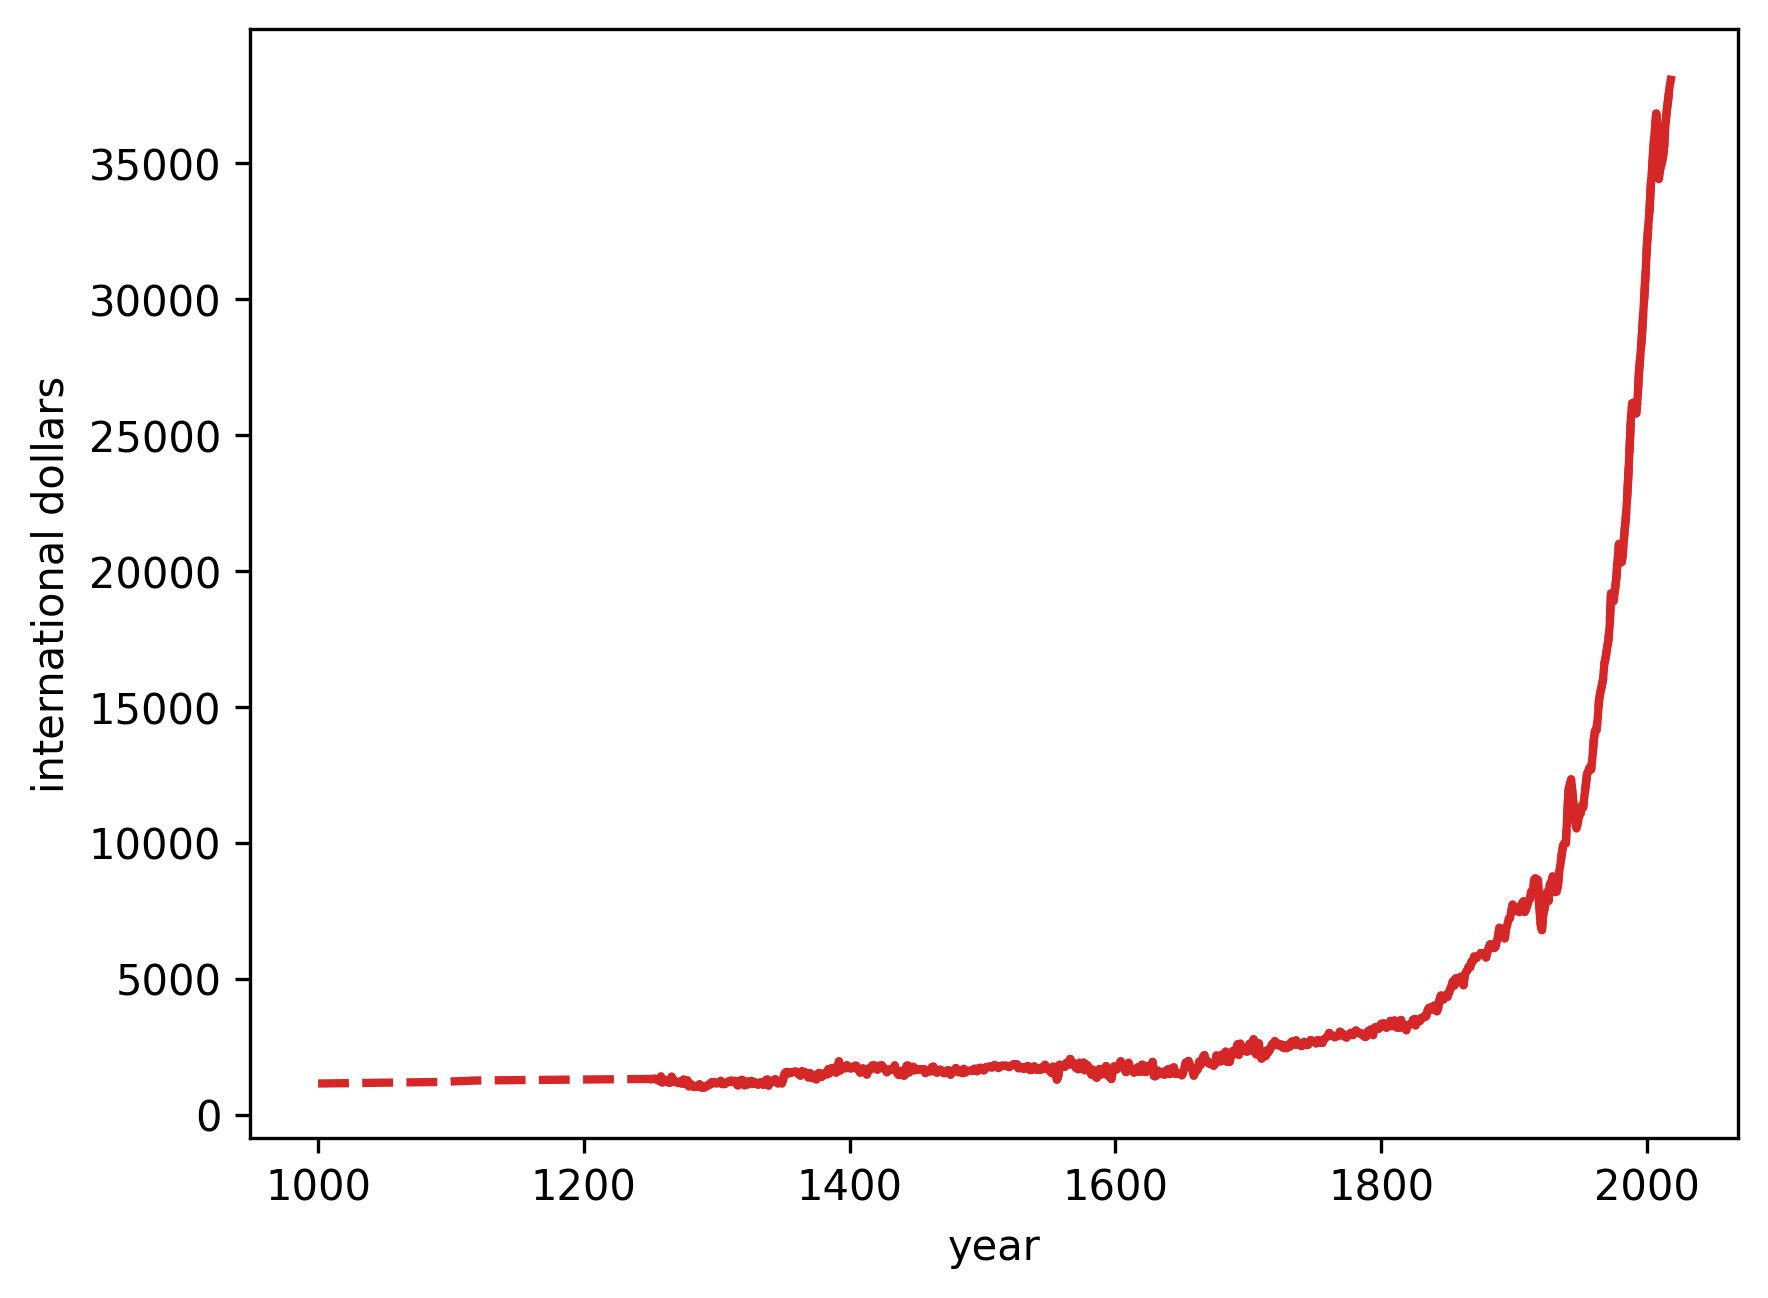

In [10]:
fig, ax = plt.subplots(dpi=300)
country = 'GBR'
ax.plot(gdp_pc[country].interpolate(),
        linestyle='--',
        lw=2,
        color=color_mapping[country])

ax.plot(gdp_pc[country],
        lw=2,
        color=color_mapping[country])
ax.set_ylabel('international dollars')
ax.set_xlabel('year')
plt.show()

### Comparing the US, UK, and China

In this section we will compare GDP growth for the US, UK and China.

As a first step we create a function to generate plots for a list of countries

In [11]:
def draw_interp_plots(series,        # pandas series
                      country,       # list of country codes
                      ylabel,        # label for y-axis
                      xlabel,        # label for x-axis
                      color_mapping, # code-color mapping
                      code_to_name,  # code-name mapping
                      lw,            # line width
                      logscale,      # log scale for y-axis
                      ax             # matplolib axis
                     ):

    for c in country:
        # Get the interpolated data
        df_interpolated = series[c].interpolate(limit_area='inside')
        interpolated_data = df_interpolated[series[c].isnull()]

        # Plot the interpolated data with dashed lines
        ax.plot(interpolated_data,
                linestyle='--',
                lw=lw,
                alpha=0.7,
                color=color_mapping[c])

        # Plot the non-interpolated data with solid lines
        ax.plot(series[c],
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,
                label=code_to_name.loc[c]['country'])
        
        if logscale:
            ax.set_yscale('log')
    
    # Draw the legend outside the plot
    ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

As you can see from this chart, economic growth started in earnest in the 18th century and continued for the next two hundred years.

How does this compare with other countries’ growth trajectories?

Let’s look at the United States (USA), United Kingdom (GBR), and China (CHN)

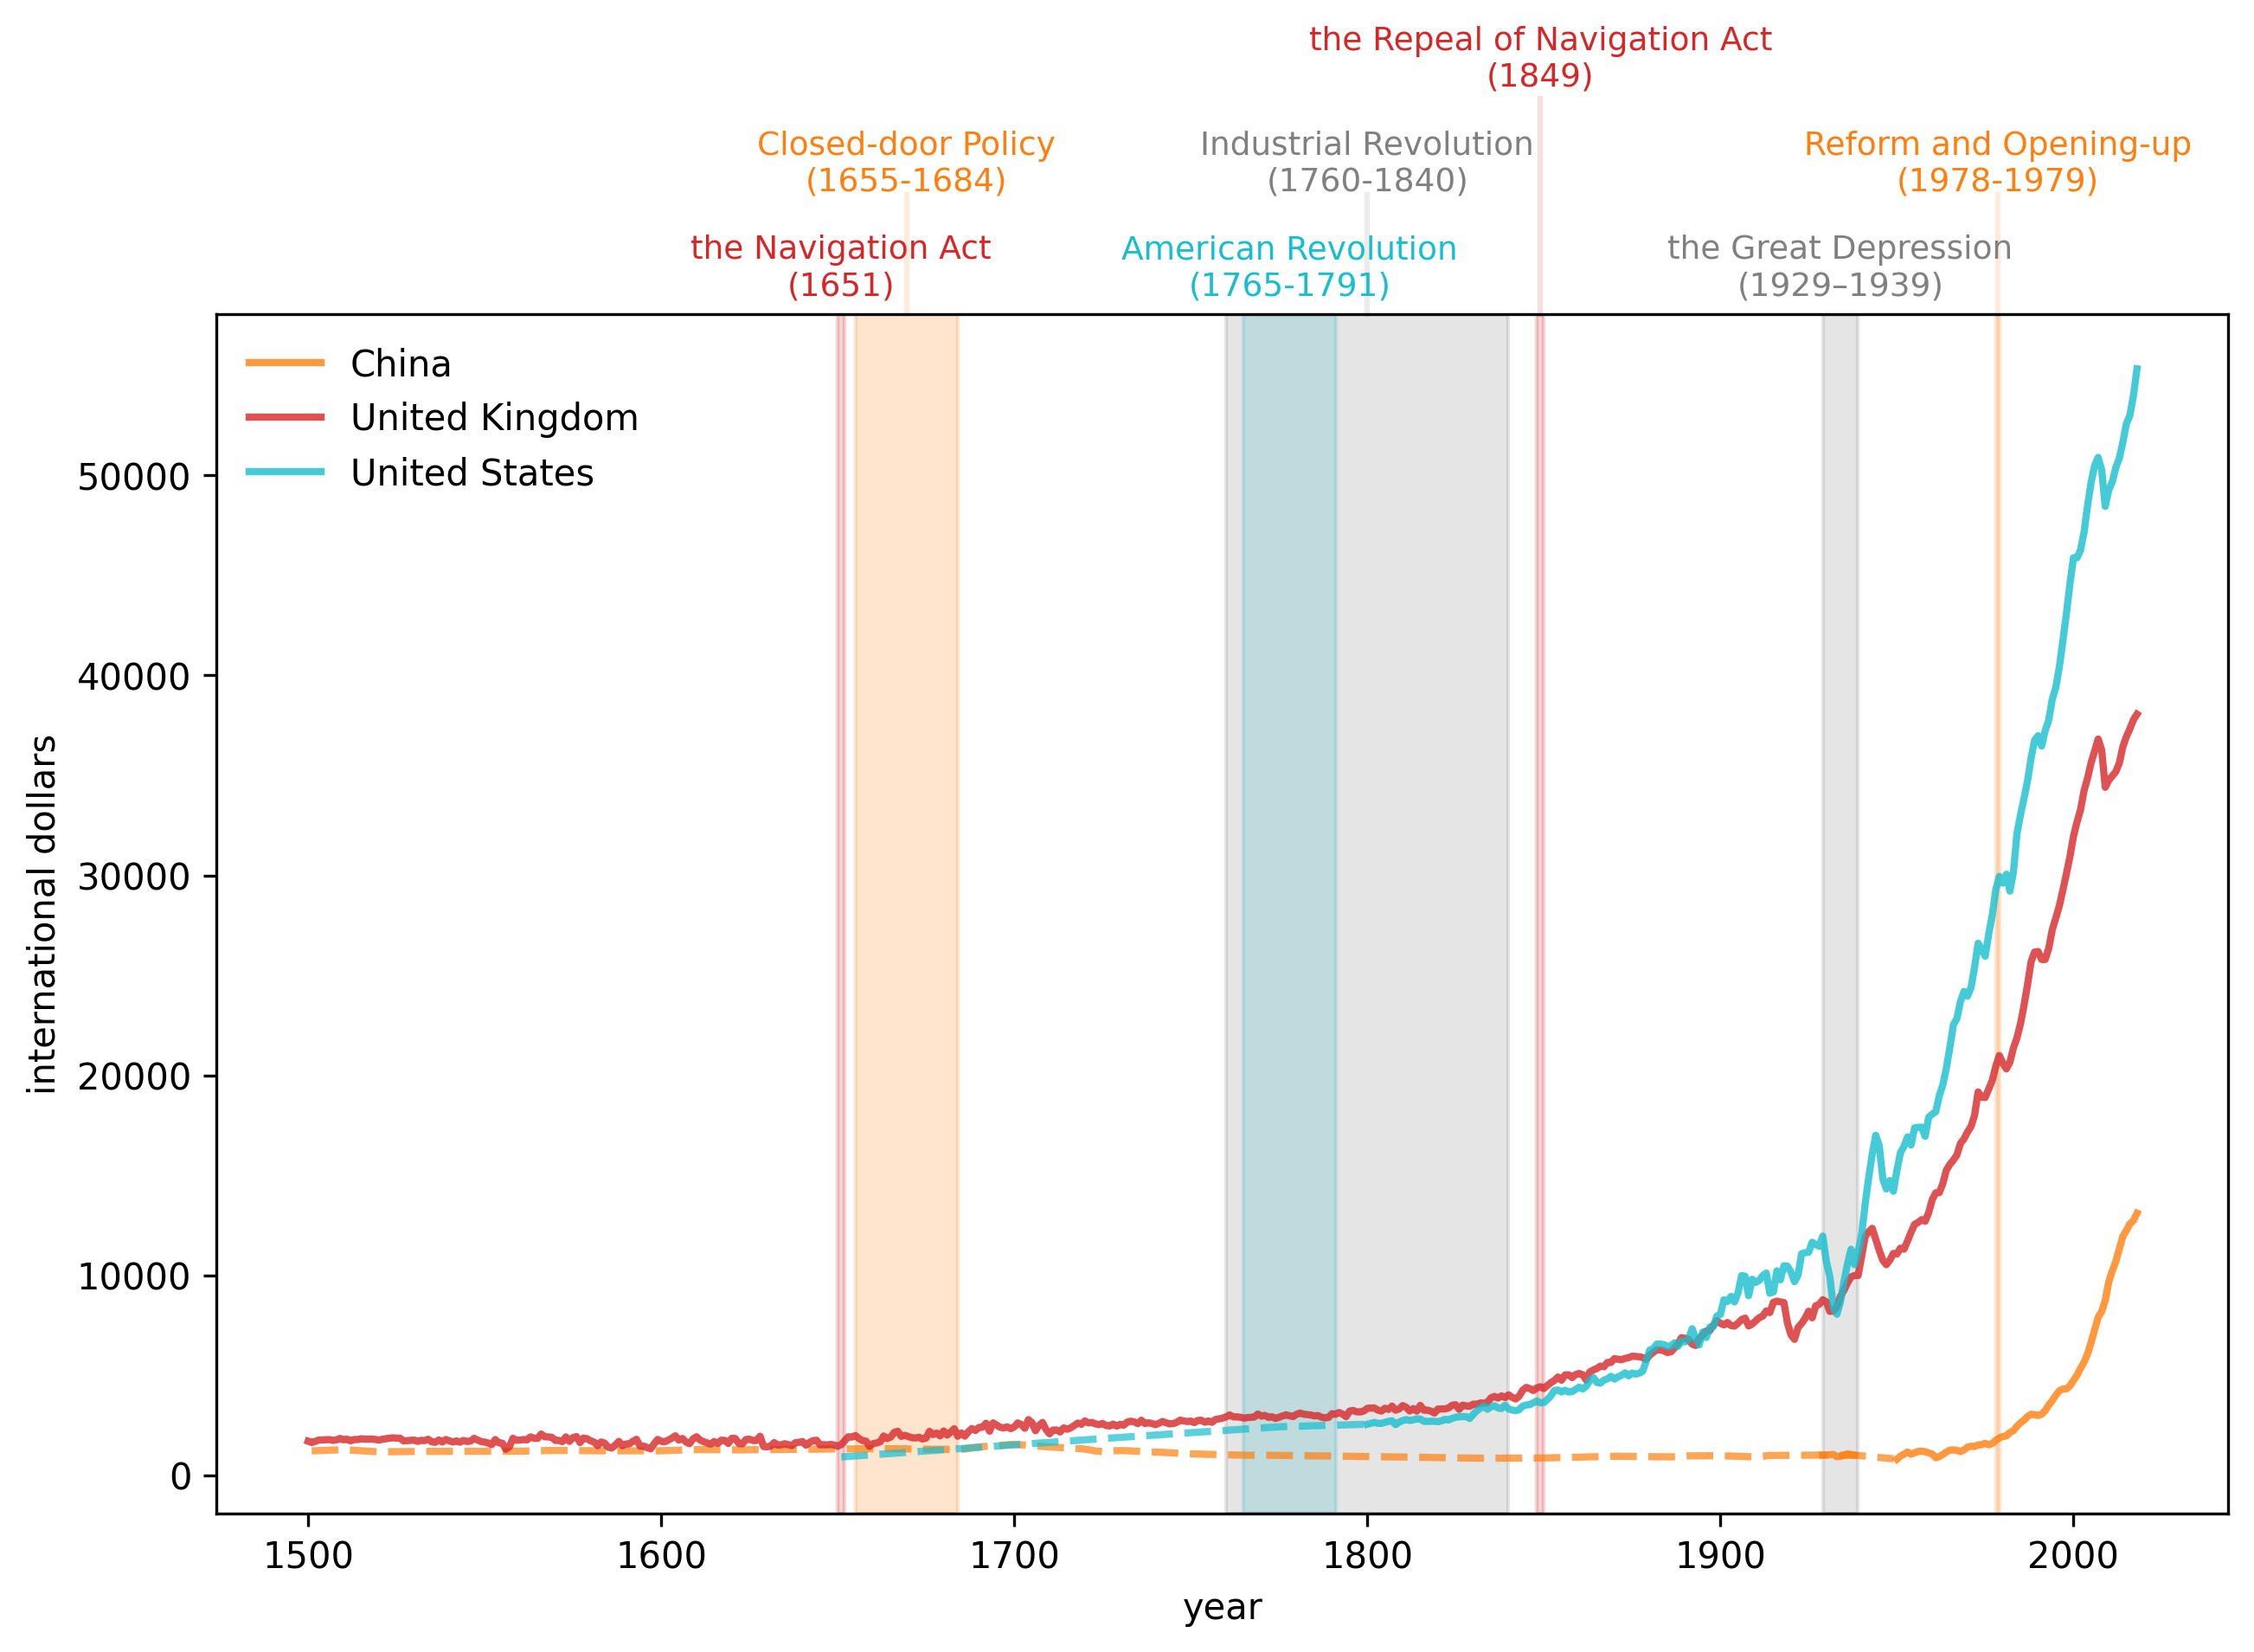

In [12]:
# Define the namedtuple for the events
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['CHN', 'GBR', 'USA']
draw_interp_plots(gdp_pc[country].loc[1500:], 
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, False, ax)

# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 
            'va':'center', 'ha':'center'}

# Create a list of events to annotate
events = [
    Event((1650, 1652), ylim + ylim*0.04, 
          'the Navigation Act\n(1651)',
          color_mapping['GBR'], 1),
    Event((1655, 1684), ylim + ylim*0.13, 
          'Closed-door Policy\n(1655-1684)', 
          color_mapping['CHN'], 1.1),
    Event((1848, 1850), ylim + ylim*0.22,
          'the Repeal of Navigation Act\n(1849)', 
          color_mapping['GBR'], 1.18),
    Event((1765, 1791), ylim + ylim*0.04, 
          'American Revolution\n(1765-1791)', 
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.13, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.1),
    Event((1929, 1939), ylim + ylim*0.04, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1),
    Event((1978, 1979), ylim + ylim*0.13, 
          'Reform and Opening-up\n(1978-1979)', 
          color_mapping['CHN'], 1.1)
]

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1, ymax=event.ymax, color=event.color,
                   clip_on=False, alpha=0.15)

# Draw events
draw_events(events, ax)
plt.show()

The preceding graph of per capita GDP strikingly reveals how the spread of the Industrial Revolution has over time gradually lifted the living standards of substantial
groups of people

- most of the growth happened in the past 150 years after the Industrial Revolution.  
- per capita GDP in the US and UK rose and diverged from that of China from 1820 to 1940.  
- the gap has closed rapidly after 1950 and especially after the late 1970s.  
- these outcomes reflect complicated combinations of technological and economic-policy factors that students of economic growth try to understand and quantify.  

### Focusing on China

It is fascinating to see China’s GDP per capita levels from 1500 through to the 1970s.

Notice the long period of declining GDP per capital levels from the 1700s until the early 20th century.

Thus, the graph indicates

- a long economic downturn and stagnation after the Closed-door Policy by the Qing government.  
- China’s very different experience than the UK’s after the onset of the industrial revolution in the UK.  
- how the Self-Strengthening Movement seemed mostly to help China to grow.  
- how stunning have been the growth achievements of modern Chinese economic policies by the PRC that culminated with its late 1970s reform and liberalization.  

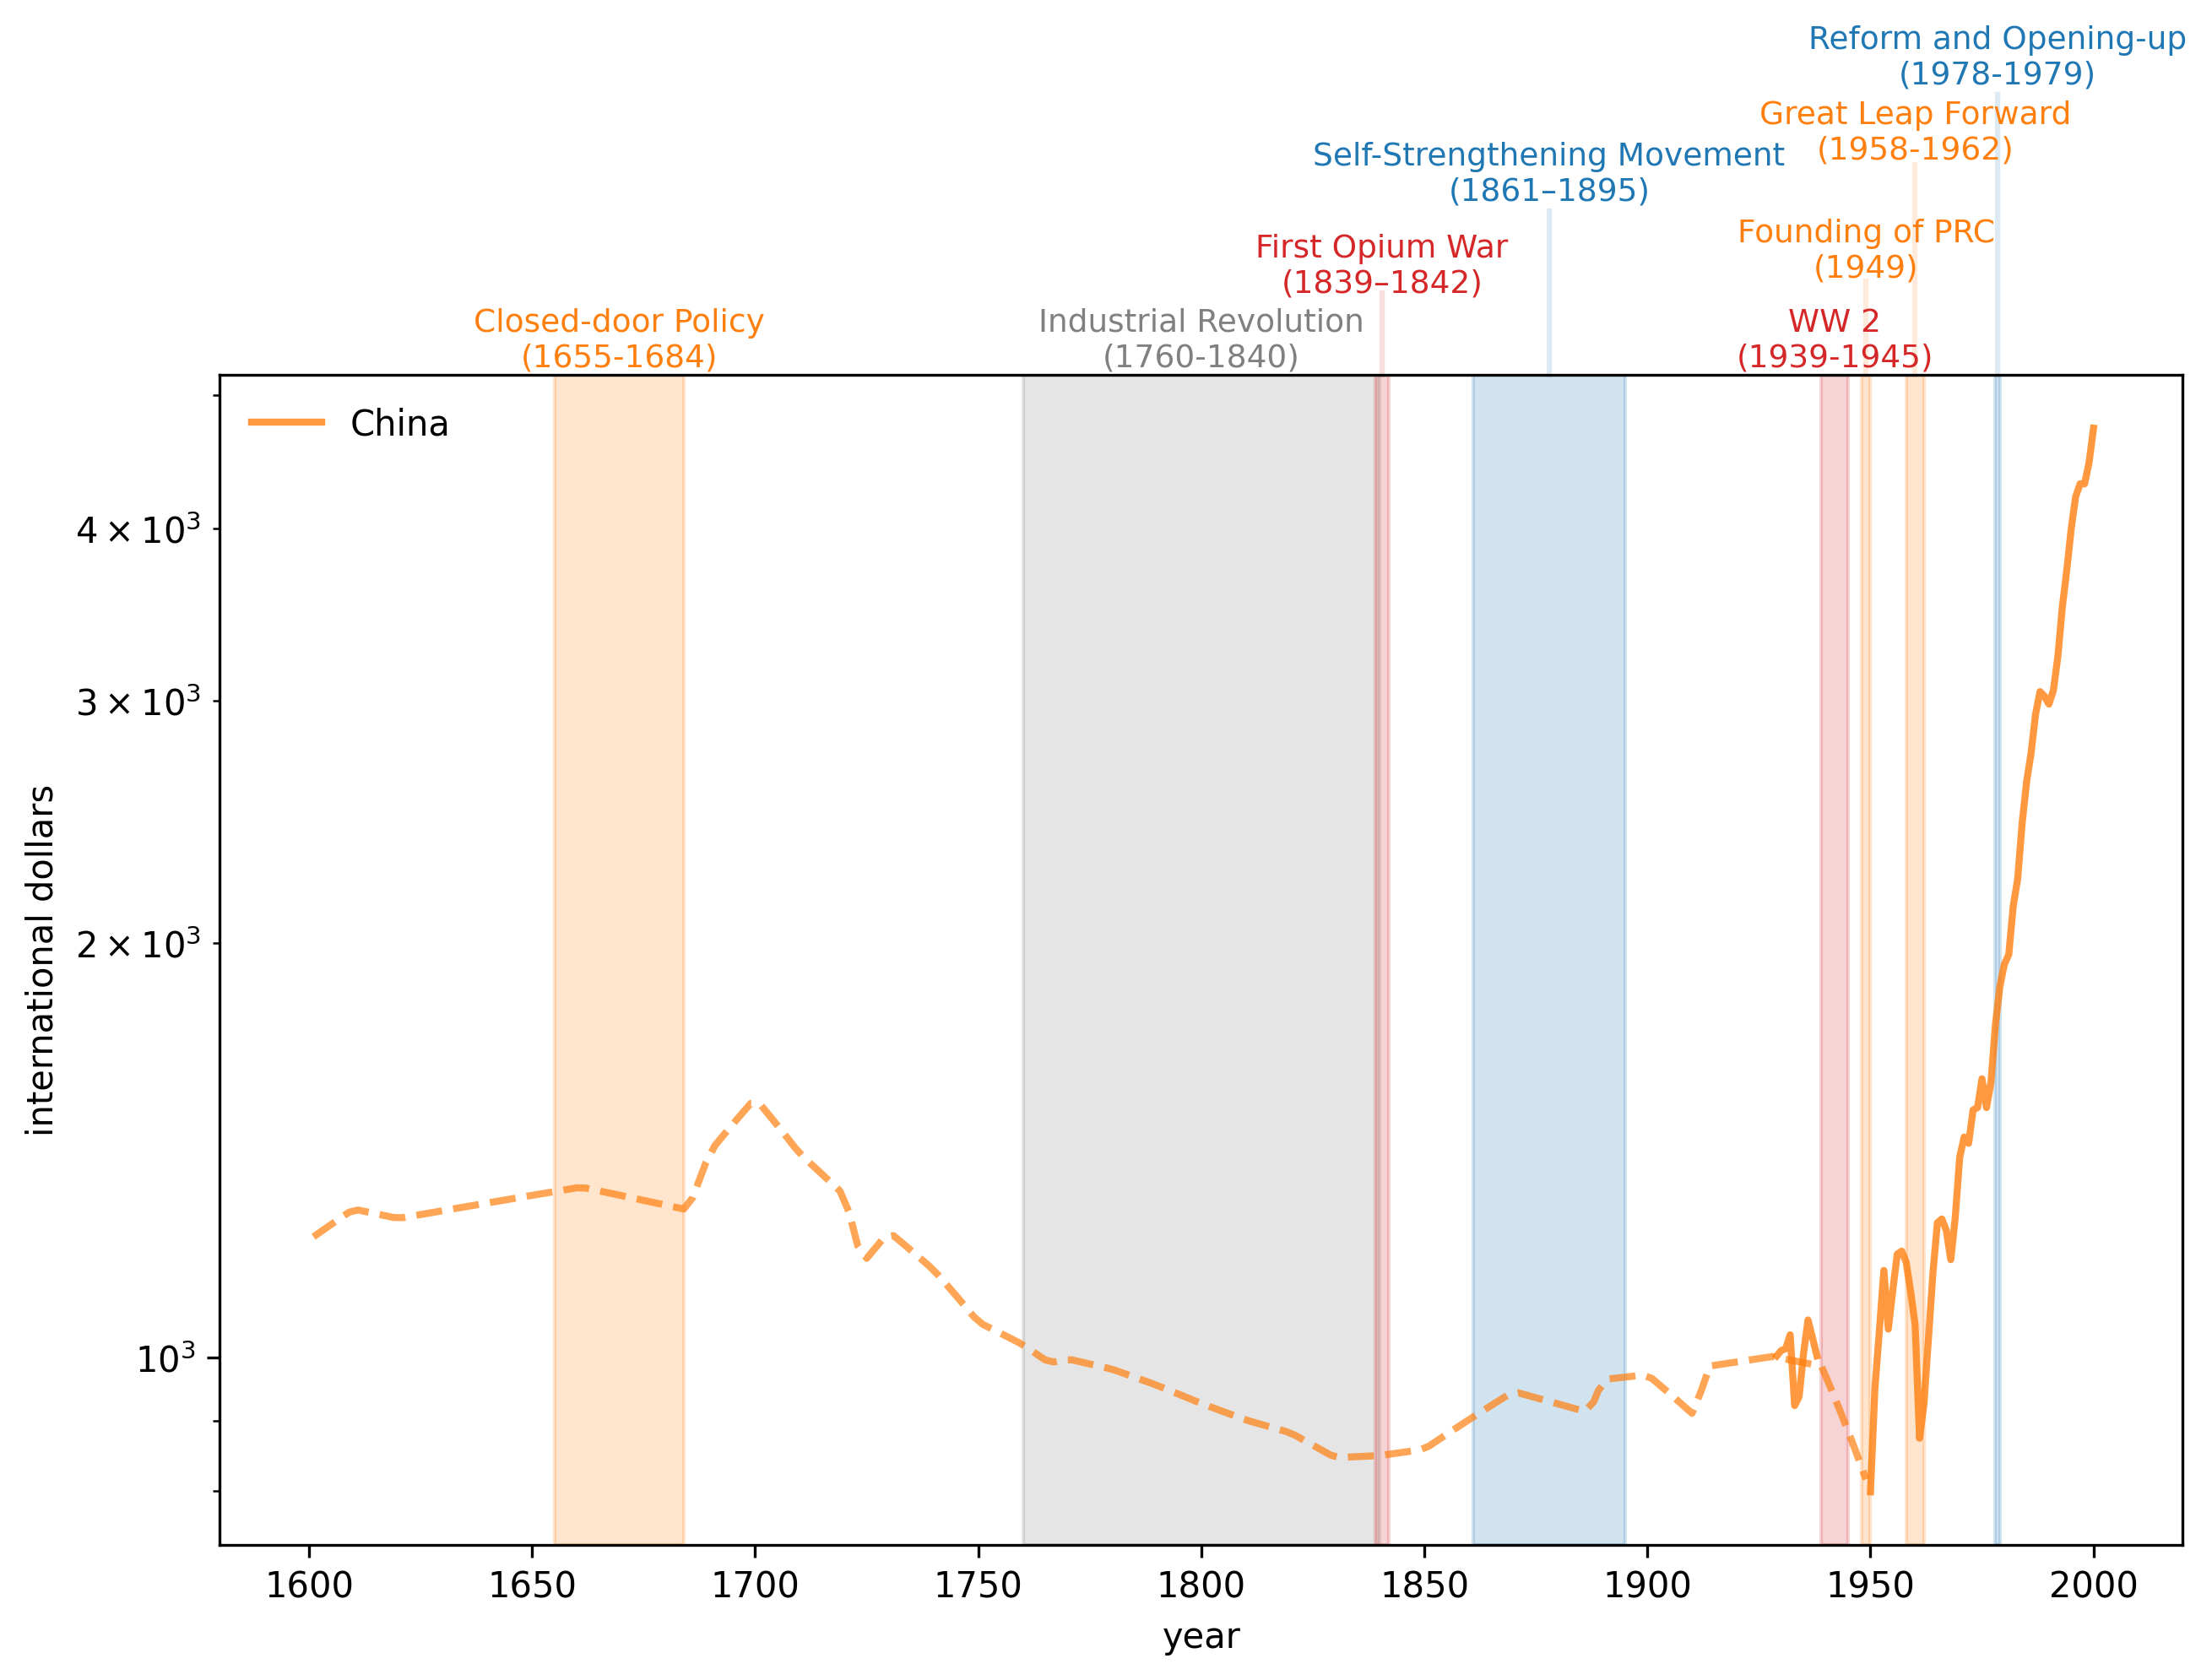

In [13]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['CHN']
draw_interp_plots(gdp_pc[country].loc[1600:2000], 
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

events = [
Event((1655, 1684), ylim + ylim*0.06, 
      'Closed-door Policy\n(1655-1684)', 
      'tab:orange', 1),
Event((1760, 1840), ylim + ylim*0.06, 
      'Industrial Revolution\n(1760-1840)', 
      'grey', 1),
Event((1839, 1842), ylim + ylim*0.2, 
      'First Opium War\n(1839–1842)', 
      'tab:red', 1.07),
Event((1861, 1895), ylim + ylim*0.4, 
      'Self-Strengthening Movement\n(1861–1895)', 
      'tab:blue', 1.14),
Event((1939, 1945), ylim + ylim*0.06, 
      'WW 2\n(1939-1945)', 
      'tab:red', 1),
Event((1948, 1950), ylim + ylim*0.23, 
      'Founding of PRC\n(1949)', 
      color_mapping['CHN'], 1.08),
Event((1958, 1962), ylim + ylim*0.5, 
      'Great Leap Forward\n(1958-1962)', 
      'tab:orange', 1.18),
Event((1978, 1979), ylim + ylim*0.7, 
      'Reform and Opening-up\n(1978-1979)', 
      'tab:blue', 1.24)
]

# Draw events
draw_events(events, ax)
plt.show()

### Focusing on the US and UK

Now we look at the United States (USA) and United Kingdom (GBR) in more detail.

In the following graph, please watch for

- impact of trade policy (Navigation Act).  
- productivity changes brought by the Industrial Revolution.  
- how the US gradually approaches and then surpasses the UK, setting the stage for the ‘‘American Century’’.  
- the often unanticipated consequences of wars.  
- interruptions and scars left by [business cycle](https://intro.quantecon.org/business_cycle.html) recessions and depressions.  

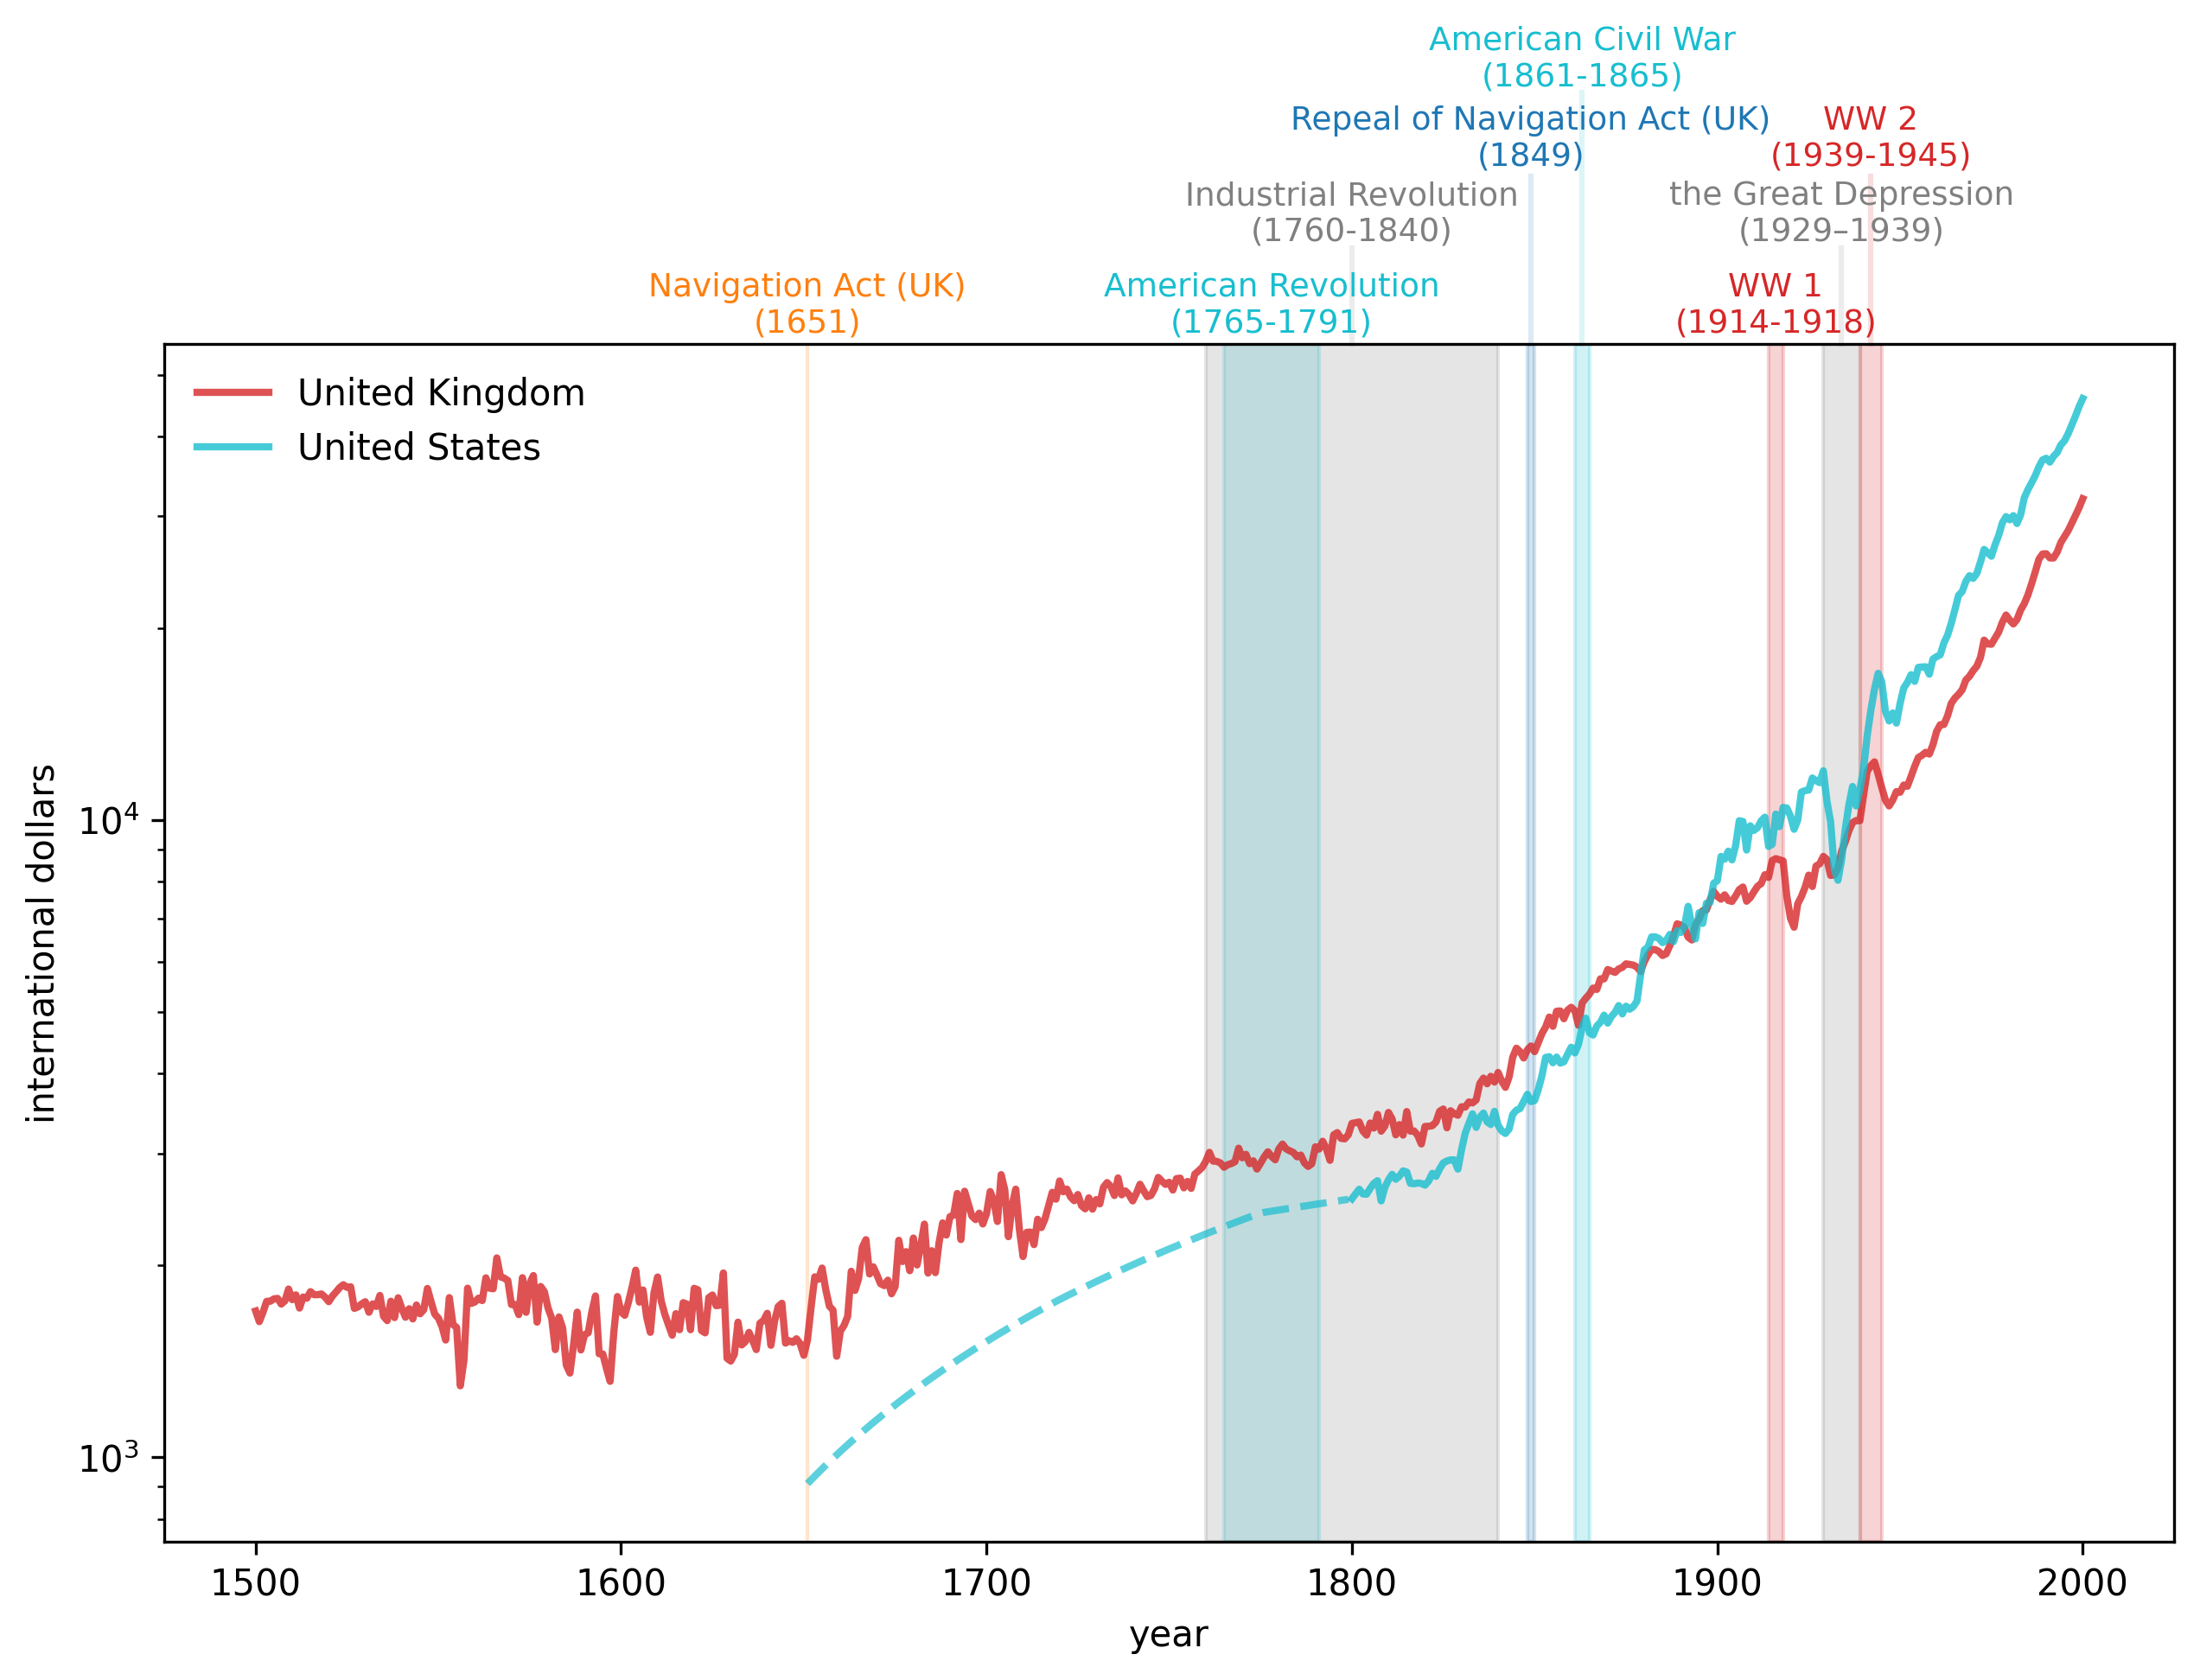

In [14]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['GBR', 'USA']
draw_interp_plots(gdp_pc[country].loc[1500:2000],
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

# Create a list of data points
events = [
    Event((1651, 1651), ylim + ylim*0.15, 
          'Navigation Act (UK)\n(1651)', 
          'tab:orange', 1),
    Event((1765, 1791), ylim + ylim*0.15, 
          'American Revolution\n(1765-1791)',
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.6, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.08),
    Event((1848, 1850), ylim + ylim*1.1, 
          'Repeal of Navigation Act (UK)\n(1849)', 
          'tab:blue', 1.14),
    Event((1861, 1865), ylim + ylim*1.8, 
          'American Civil War\n(1861-1865)', 
          color_mapping['USA'], 1.21),
    Event((1914, 1918), ylim + ylim*0.15, 
          'WW 1\n(1914-1918)', 
          'tab:red', 1),
    Event((1929, 1939), ylim + ylim*0.6, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1.08),
    Event((1939, 1945), ylim + ylim*1.1, 
          'WW 2\n(1939-1945)', 
          'tab:red', 1.14)
]

# Draw events
draw_events(events, ax)
plt.show()

## GDP growth

Now we’ll construct some graphs of interest to geopolitical historians like Adam Tooze.

We’ll focus on total Gross Domestic Product (GDP) (as a proxy for ‘‘national geopolitical-military power’’) rather than focusing on GDP per capita (as a proxy for living standards).

In [15]:
data = pd.read_excel(data_url, sheet_name='Full data')
data.set_index(['countrycode', 'year'], inplace=True)
data['gdp'] = data['gdppc'] * data['pop']
gdp = data['gdp'].unstack('countrycode')

### Early industrialization (1820 to 1940)

We first visualize the trend of China, the Former Soviet Union, Japan, the UK and the US.

The most notable trend is the rise of the US, surpassing the UK in the 1860s and China in the 1880s.

The growth continued until the large dip in the 1930s when the Great Depression hit.

Meanwhile, Russia experienced significant setbacks during World War I and recovered significantly after the February Revolution.

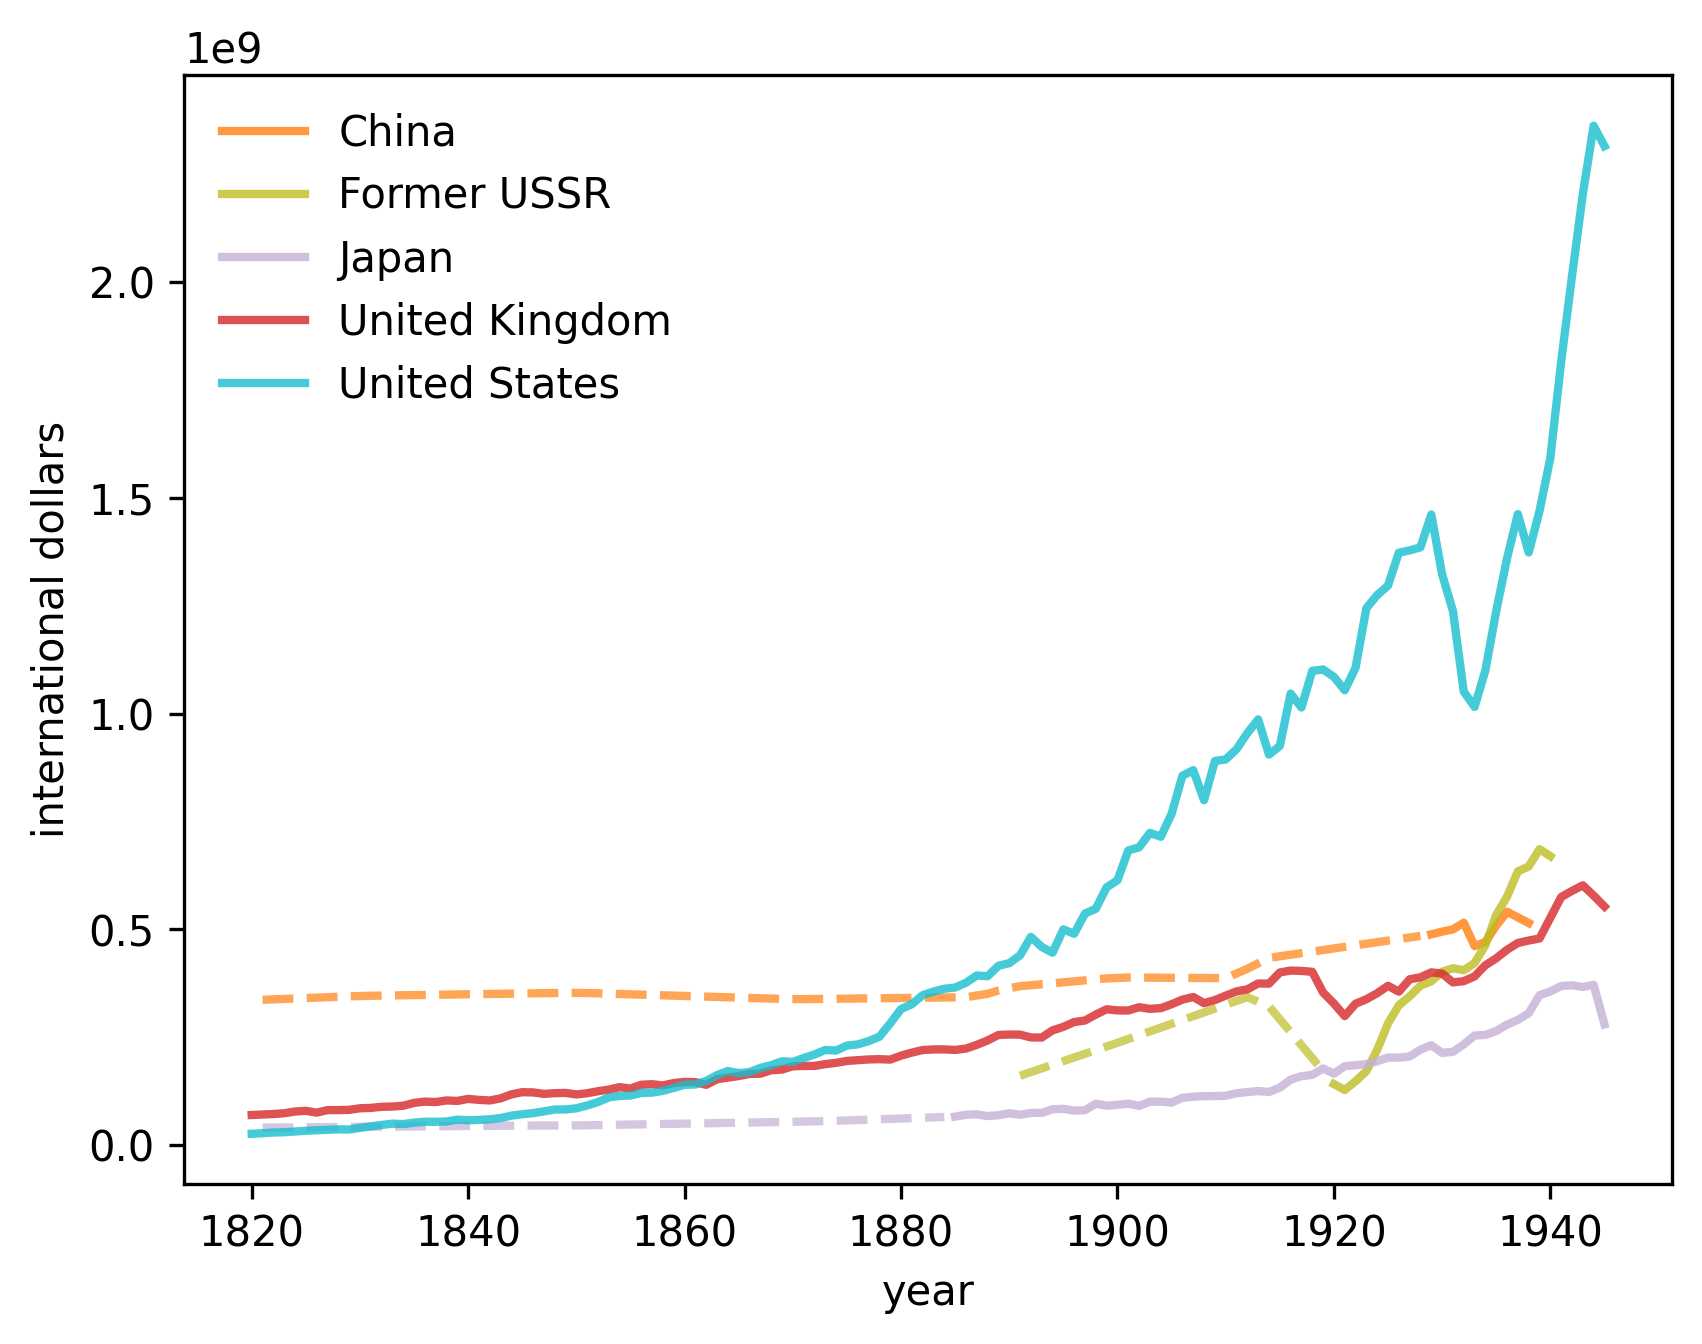

In [16]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1820, 1945)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

#### Constructing a plot similar to Tooze’s

In this section we describe how we have constructed a version of the striking figure from chapter 1 of [[Tooze, 2014](https://intro.quantecon.org/zreferences.html#id16)] that we discussed at the start of this lecture.

Let’s first define a collection of countries that consist of the British Empire (BEM) so we can replicate that series in  Tooze’s chart.

In [17]:
BEM = ['GBR', 'IND', 'AUS', 'NZL', 'CAN', 'ZAF']
# Interpolate incomplete time-series
gdp['BEM'] = gdp[BEM].loc[start_year-1:end_year].interpolate(method='index').sum(axis=1)

Now let’s assemble our series and get ready to plot them.

In [18]:
# Define colour mapping and name for BEM
color_mapping['BEM'] = color_mapping['GBR']  # Set the color to be the same as Great Britain
# Add British Empire to code_to_name
bem = pd.DataFrame(["British Empire"], index=["BEM"], columns=['country'])
bem.index.name = 'countrycode'
code_to_name = pd.concat([code_to_name, bem])

FileNotFoundError: [Errno 2] No such file or directory: '/home/michael/ubuntu-repos/lecture-python-intro.notebooks/_static/lecture_specific/long_run_growth/tooze_ch1_graph.png'

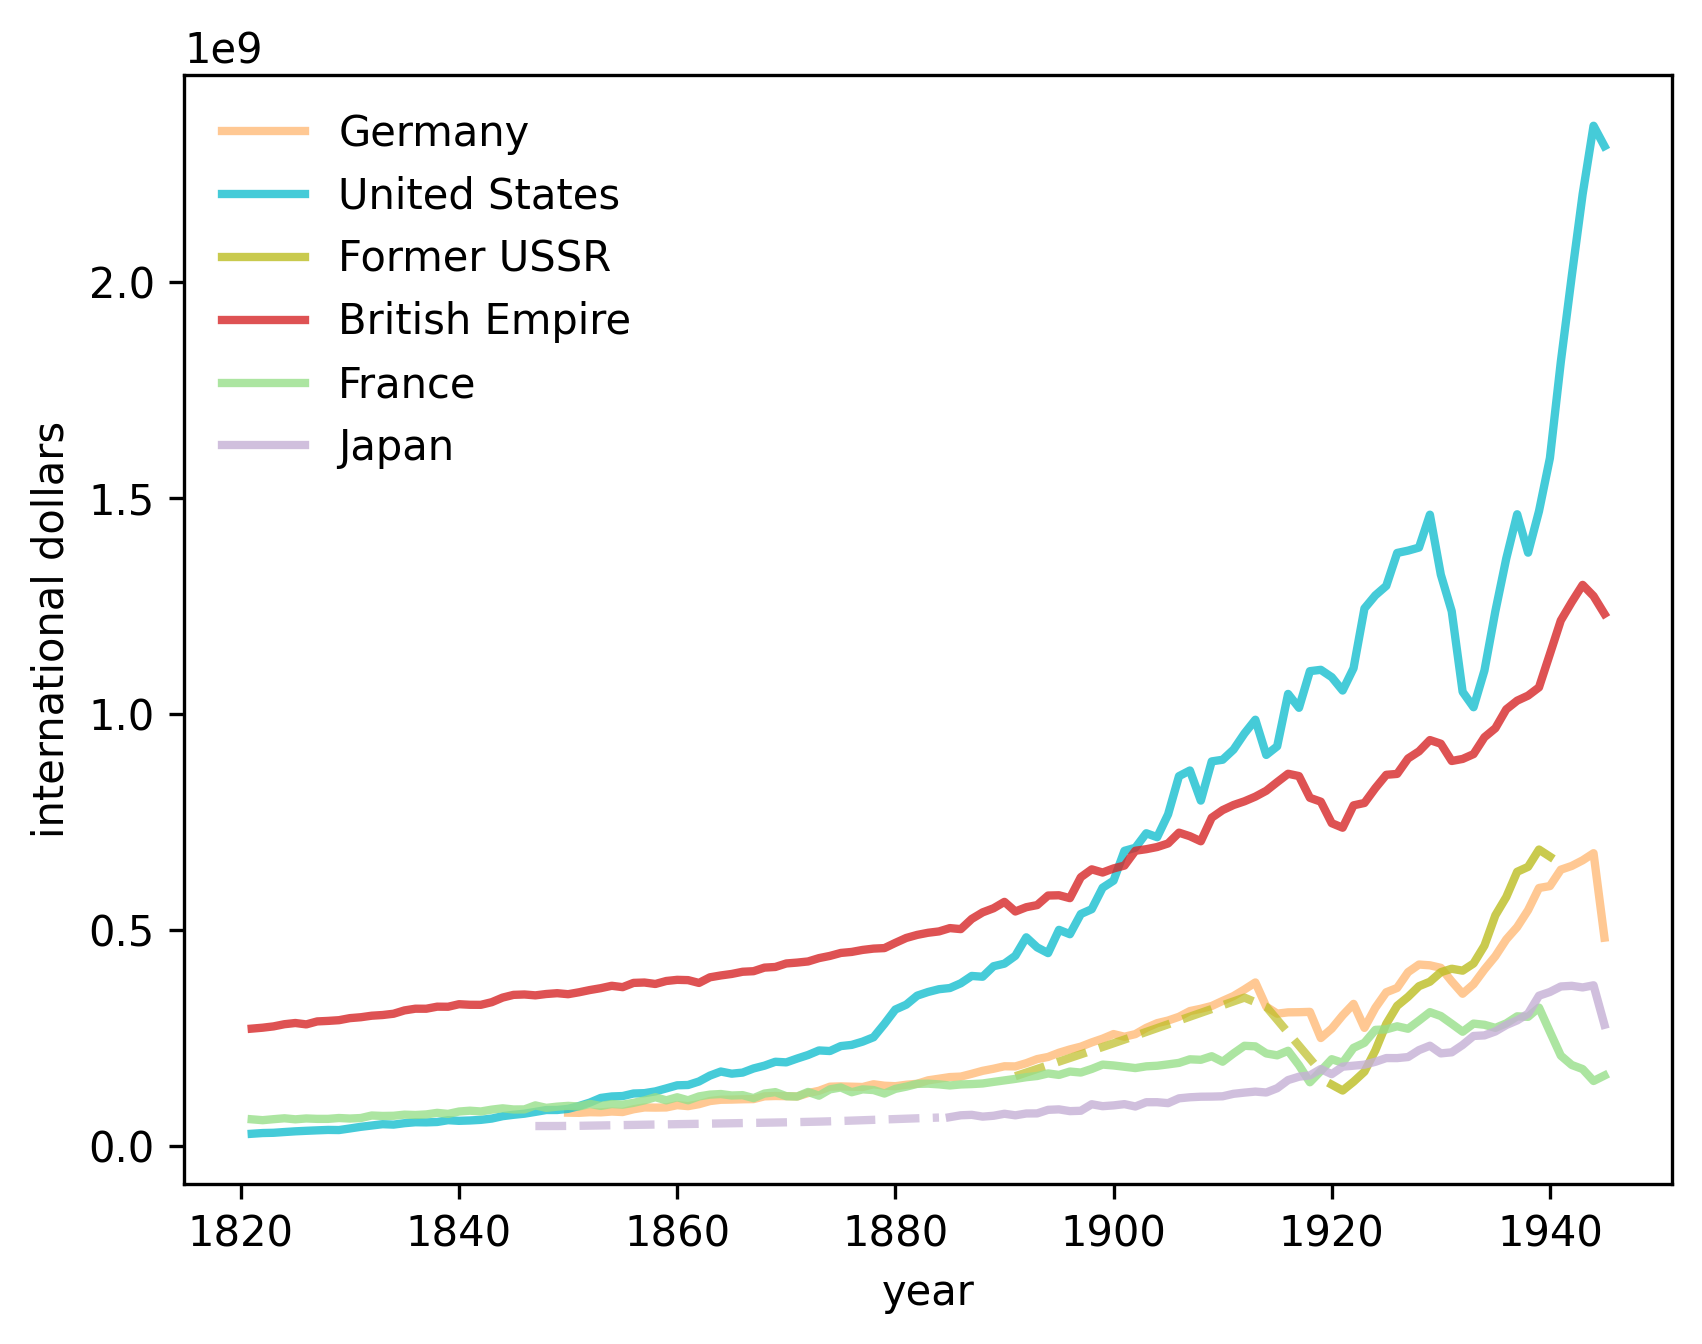

In [19]:
fig, ax = plt.subplots(dpi=300)
country = ['DEU', 'USA', 'SUN', 'BEM', 'FRA', 'JPN']
start_year, end_year = (1821, 1945)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

plt.savefig("./_static/lecture_specific/long_run_growth/tooze_ch1_graph.png", dpi=300,
            bbox_inches='tight')
plt.show()

At the start of this lecture, we noted  how US GDP came from “nowhere” at the start of the 19th century to rival and then overtake the GDP of the British Empire
by the end of the 19th century, setting the geopolitical stage for the “American (twentieth) century”.

Let’s move forward in time and start roughly where Tooze’s graph stopped after World War II.

In the spirit of Tooze’s chapter 1 analysis, doing this will provide some information about geopolitical realities today.

### The modern era (1950 to 2020)

The following graph displays how quickly China has grown, especially since the late 1970s.

In [ ]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1950, 2020)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

It is tempting to compare this graph with figure Fig. 2.6 that showed the US overtaking the UK near the start of the “American Century”, a version of the graph featured in chapter 1 of  [[Tooze, 2014](https://intro.quantecon.org/zreferences.html#id16)].

## Regional analysis

We often want to study the historical experiences of countries outside the club of “World Powers”.

The [Maddison Historical Statistics](https://www.rug.nl/ggdc/historicaldevelopment/maddison/) dataset also includes regional aggregations

In [ ]:
data = pd.read_excel(data_url, 
                     sheet_name='Regional data', 
                     header=(0,1,2),
                     index_col=0)
data.columns = data.columns.droplevel(level=2)

We can save the raw data in a more convenient format to build a single table of regional GDP per capita

In [ ]:
regionalgdp_pc = data['gdppc_2011'].copy()
regionalgdp_pc.index = pd.to_datetime(regionalgdp_pc.index, format='%Y')

Let’s interpolate based on time to fill in any gaps in the dataset for the purpose of plotting

In [ ]:
regionalgdp_pc.interpolate(method='time', inplace=True)

Looking more closely, let’s compare the time series for `Western Offshoots` and `Sub-Saharan Africa` with a number of different regions around the world.

Again we see the divergence of the West from the rest of the world after the Industrial Revolution and the convergence of the world after the 1950s

In [ ]:
fig, ax = plt.subplots(dpi=300)
regionalgdp_pc.plot(ax=ax, xlabel='year',
                    lw=2,
                    ylabel='international dollars')
ax.set_yscale('log')
plt.legend(loc='lower center',
           ncol=3, bbox_to_anchor=[0.5, -0.5])
plt.show()